Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
#import data: miami_bikes.csv to the notebook.
#Preview dataframes with df.head()

miami_bikes = pd.read_csv('../data/miami_bikes.csv')
miami_bikes.head()

foursquare_data = pd.read_csv('../data/foursquare_data.csv')
foursquare_data.head()

,Name,Locality,Popularity,Price,Rating,Category1,Category2,Category3,Latitude,Longitude,Bike_Station_Coordinates
0,Bombay Darbar,Miami,0.977682,2.0,9.0,Indian Restaurant,Food and Beverage Service,Dining and Drinking,25.729251,-80.240721,"25.729275,-80.241581"
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,Latin American Restaurant,Seafood Restaurant,Dining and Drinking,25.728360,-80.242803,"25.729275,-80.241581"
2,Mister O1 Extraordinary Pizza,Miami,0.974360,1.0,8.2,Pizzeria,NaN,NaN,25.728740,-80.242009,"25.729275,-80.241581"
3,Le Pain Quotidien,Miami,0.952608,1.0,8.6,Café,NaN,NaN,25.727386,-80.242620,"25.729275,-80.241581"
4,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,New American Restaurant,Pizzeria,NaN,25.727746,-80.242118,"25.729275,-80.241581"


In [4]:
#Iterate through each bike station from miami_bikes.csv
Bike_Station_Coordinates = []
# Iterate through rows using iterrows()

for index, row in miami_bikes.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    Bike_Station_Coordinates.append((latitude, longitude))

In [5]:
#add bike station coordinates to miami_bikes
miami_bikes["station_coordinates"] = Bike_Station_Coordinates

In [6]:
miami_bikes.head()

,latitude,longitude,bikes,station_coordinates
0,25.729275,-80.241581,3,"(25.729275, -80.241581)"
1,25.732522,-80.233244,3,"(25.732522, -80.233244)"
2,25.751100,-80.202641,4,"(25.7511, -80.202641)"
3,25.760082,-80.196217,2,"(25.760082, -80.196217)"
4,25.761884,-80.193101,1,"(25.761884, -80.193101)"


In [7]:
#Print how the dataframe looks when filtering for 1 coordinate
print(miami_bikes.loc[miami_bikes['station_coordinates'] == (25.729275,-80.241581)])

    latitude  longitude  bikes      station_coordinates
0  25.729275 -80.241581      3  (25.729275, -80.241581)


In [8]:
#join foursquare_data with miami_bikes
#Iterate through each row from foursquare_data.csv
free_bikes= []

# Add an empty column in the foursquare dataframe
foursquare_data['bikes'] = None

for index, row in foursquare_data.iterrows():
    bike_coordinates = row['Bike_Station_Coordinates']
    latitude, longitude = bike_coordinates.split(',')
    formatted_value = (float(latitude), float(longitude))
    bikes = miami_bikes.loc[miami_bikes['station_coordinates'] == formatted_value]['bikes'].values[0]
    
    # update the df at the current index
    foursquare_data.at[index, 'bikes'] = bikes
#     free_bikes.append(bikes)

foursquare_data.head()

,Name,Locality,Popularity,Price,Rating,Category1,Category2,Category3,Latitude,Longitude,Bike_Station_Coordinates,bikes
0,Bombay Darbar,Miami,0.977682,2.0,9.0,Indian Restaurant,Food and Beverage Service,Dining and Drinking,25.729251,-80.240721,"25.729275,-80.241581",3
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,Latin American Restaurant,Seafood Restaurant,Dining and Drinking,25.728360,-80.242803,"25.729275,-80.241581",3
2,Mister O1 Extraordinary Pizza,Miami,0.974360,1.0,8.2,Pizzeria,NaN,NaN,25.728740,-80.242009,"25.729275,-80.241581",3
3,Le Pain Quotidien,Miami,0.952608,1.0,8.6,Café,NaN,NaN,25.727386,-80.242620,"25.729275,-80.241581",3
4,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,New American Restaurant,Pizzeria,NaN,25.727746,-80.242118,"25.729275,-80.241581",3


In [9]:
#QA test: Check to ensure that the number of bikes matches the station that was provided on miami_bikes.csv
#Expecting 20 bikes
station1 = foursquare_data.loc[foursquare_data['Bike_Station_Coordinates']== '25.765327,-80.131324']
station1

,Name,Locality,Popularity,Price,Rating,Category1,Category2,Category3,Latitude,Longitude,Bike_Station_Coordinates,bikes
436,Smith & Wollensky - Miami Beach,Miami Beach,0.985989,3.0,8.7,Seafood Restaurant,Steakhouse,NaN,25.765904,-80.134019,"25.765327,-80.131324",20
437,The Lobster Shack,Miami Beach,0.990337,3.0,8.6,Seafood Restaurant,NaN,NaN,25.768183,-80.132688,"25.765327,-80.131324",20
438,Carbone,Miami Beach,0.989274,2.0,9.0,Italian Restaurant,NaN,NaN,25.769431,-80.133764,"25.765327,-80.131324",20
439,Nikki Beach,Miami Beach,0.998889,3.0,8.6,Night Club,American Restaurant,Japanese Restaurant,25.769090,-80.132260,"25.765327,-80.131324",20
440,Joe's Stone Crab,Miami Beach,0.994782,4.0,9.0,American Restaurant,Seafood Restaurant,NaN,25.768798,-80.135086,"25.765327,-80.131324",20
441,Call Me Gaby,Miami Beach,0.969127,2.0,9.0,Pizzeria,Italian Restaurant,NaN,25.768881,-80.135634,"25.765327,-80.131324",20
442,Santorini by Georgios,Miami Beach,0.982462,2.0,8.4,Greek Restaurant,Middle Eastern Restaurant,Seafood Restaurant,25.769695,-80.132546,"25.765327,-80.131324",20
443,Prime Italian,Miami Beach,0.988936,4.0,8.5,Italian Restaurant,NaN,NaN,25.769675,-80.132838,"25.765327,-80.131324",20
444,Estiatorio Milos by Costas Spiliadis,Miami Beach,0.973186,3.0,9.0,Greek Restaurant,Mediterranean Restaurant,Seafood Restaurant,25.769718,-80.135683,"25.765327,-80.131324",20
445,Joe's Take-Away,Miami Beach,0.982849,2.0,8.5,Seafood Restaurant,NaN,NaN,25.768569,-80.135094,"25.765327,-80.131324",20


In [10]:
#drop unwanted columns in combined dataframe
#drop latitude and longitude of point of interest/business

combined_data = foursquare_data.drop(columns = ['Latitude', 'Longitude'])

In [39]:
#Make a new column that indicates what the category is for each row (only looking at the main category)

type_list = ['Restaurant','Café','Coffee', 'Bar','College and University','Bakery','Steakhouse', 'Pizzeria']
place_type = []
excluded_categories = set()

for index, row in combined_data.iterrows():
    match1 = next((x for x in type_list if x in str(row['Category1'])), None)
    match2 = next((x for x in type_list if x in str(row['Category2'])), None)
    match3 = next((x for x in type_list if x in str(row['Category3'])), None)
    final_match = match1 or match2 or match3
    
    if final_match == 'Coffee':
        final_match = 'Café'

    if final_match:
        place_type.append(final_match)
    else:
        excluded_categories.add(row['Category1'])
        excluded_categories.add(row['Category2'])
        excluded_categories.add(row['Category3'])
        place_type.append(None)

#Take a look at categories that were excluded
print("Excluded categories are:")
print(excluded_categories)

Excluded categories are:
{'Fried Chicken Joint', 'Burger Joint', 'Dining and Drinking', nan, 'Deli', 'BBQ Joint', 'Ice Cream Parlor', 'Bistro'}


In [40]:
# #Add place_type to dataframe
combined_data['Place_Type'] = place_type

#See if Place_Type looks correct in dataframe
combined_data.head()

,Name,Locality,Popularity,Price,Rating,Category1,Category2,Category3,Bike_Station_Coordinates,bikes,Place_Type
0,Bombay Darbar,Miami,0.977682,2.0,9.0,Indian Restaurant,Food and Beverage Service,Dining and Drinking,"25.729275,-80.241581",3,Restaurant
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,Latin American Restaurant,Seafood Restaurant,Dining and Drinking,"25.729275,-80.241581",3,Restaurant
2,Mister O1 Extraordinary Pizza,Miami,0.974360,1.0,8.2,Pizzeria,NaN,NaN,"25.729275,-80.241581",3,Pizzeria
3,Le Pain Quotidien,Miami,0.952608,1.0,8.6,Café,NaN,NaN,"25.729275,-80.241581",3,Café
4,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,New American Restaurant,Pizzeria,NaN,"25.729275,-80.241581",3,Restaurant


In [41]:
#Drop all category columns and preview new dataframe
combined_data = combined_data.drop(columns= ['Category1', 'Category2', 'Category3'])

combined_data.head()

,Name,Locality,Popularity,Price,Rating,Bike_Station_Coordinates,bikes,Place_Type
0,Bombay Darbar,Miami,0.977682,2.0,9.0,"25.729275,-80.241581",3,Restaurant
1,Jaguar Ceviche Spoon Bar,Miami,0.973000,2.0,8.6,"25.729275,-80.241581",3,Restaurant
2,Mister O1 Extraordinary Pizza,Miami,0.974360,1.0,8.2,"25.729275,-80.241581",3,Pizzeria
3,Le Pain Quotidien,Miami,0.952608,1.0,8.6,"25.729275,-80.241581",3,Café
4,Harry's Pizzeria,Coconut Grove,0.953315,2.0,8.4,"25.729275,-80.241581",3,Restaurant


In [42]:
#Take a look at how any null values there are
#Remove rows that have Null for Place_Type. They will not be used in the analysis

combined_data_clean = combined_data.dropna(subset=['Place_Type'])

In [43]:
#Make a list of remaining columns. 
print(combined_data_clean.columns)
print(combined_data_clean.dtypes)

#All data-types look like they are in the appropriate format
#No reamining columns that need to be removed at this time

Index(['Name', 'Locality', 'Popularity', 'Price', 'Rating',
       'Bike_Station_Coordinates', 'bikes', 'Place_Type'],
      dtype='object')
Name                         object
Locality                     object
Popularity                  float64
Price                       float64
Rating                      float64
Bike_Station_Coordinates     object
bikes                        object
Place_Type                   object
dtype: object


In [44]:
#Change bikes datatype to interger
combined_data_clean = combined_data_clean.astype({"bikes": int})

#confirm data type has been changed
print(combined_data_clean.dtypes)

Name                         object
Locality                     object
Popularity                  float64
Price                       float64
Rating                      float64
Bike_Station_Coordinates     object
bikes                         int32
Place_Type                   object
dtype: object


In [45]:
#Within numerical columns, see how many NULL values are present
combined_data_clean.isna().sum()

Name                         0
Locality                     0
Popularity                   9
Price                       72
Rating                      32
Bike_Station_Coordinates     0
bikes                        0
Place_Type                   0
dtype: int64

In [46]:
#Look at rows that have NULL value in column Price
print(combined_data_clean[combined_data_clean['Place_Type'].str.contains('College')])

                                   Name     Locality  Popularity  Price  \
21    Universidad Del Caribe of Florida        Miami         NaN    NaN   
24                    Unicaribe College        Miami         NaN    NaN   
25                   Miami Dade College        Miami         NaN    NaN   
373                  Breakthrough Miami        Miami    0.088511    NaN   
375                      Seawalls Class        Miami    0.554760    NaN   
1302                University of Miami  Miami Beach         NaN    NaN   

      Rating Bike_Station_Coordinates  bikes              Place_Type  
21       NaN       25.7511,-80.202641      4  College and University  
24       NaN       25.7511,-80.202641      4  College and University  
25       NaN       25.7511,-80.202641      4  College and University  
373      NaN     25.747976,-80.210054      3  College and University  
375      NaN     25.747976,-80.210054      3  College and University  
1302     NaN      25.852079,-80.13755     13  Co

In [47]:
#Look at rows that have NULL value in column Price
print(combined_data_clean[combined_data_clean['Rating'].isnull()])

                                              Name            Locality  \
21               Universidad Del Caribe of Florida               Miami   
22                                       Cure Cafe               Miami   
23    Le Café At The Santa Maria Condo On Brickell               Miami   
24                               Unicaribe College               Miami   
25                              Miami Dade College               Miami   
110                                 Taste of Miami               Miami   
111                            New York Roma Pizza               Miami   
112                                     Gordo Cafe               Miami   
113                               Fritanga Tiscapa               Miami   
114                   La Valentina Mexican Kitchen               Miami   
115                                   Man vs Fries               Miami   
373                             Breakthrough Miami               Miami   
374                                El 

In [48]:
#Look at rows that have NULL value in column Popularity                   
print(combined_data_clean[combined_data_clean['Popularity'].isnull()])

                                   Name     Locality  Popularity  Price  \
21    Universidad Del Caribe of Florida        Miami         NaN    NaN   
24                    Unicaribe College        Miami         NaN    NaN   
25                   Miami Dade College        Miami         NaN    NaN   
115                        Man vs Fries        Miami         NaN    NaN   
1253             Morgans at Arlen Beach  Miami Beach         NaN    NaN   
1302                University of Miami  Miami Beach         NaN    NaN   
1303         7tyone Restaurant & Coffee  Miami Beach         NaN    NaN   
1345                 Divine Enterprises  Miami Beach         NaN    NaN   
1346                         Surfnsides     Surfside         NaN    NaN   

      Rating Bike_Station_Coordinates  bikes              Place_Type  
21       NaN       25.7511,-80.202641      4  College and University  
24       NaN       25.7511,-80.202641      4  College and University  
25       NaN       25.7511,-80.20264

In [ ]:
#Keep Universities and Colleges
#Remove businesses with no rating (numerical and will affect the mean)
#Reassess and take a look at price (price is categorical ordinal data-may not be important in the analysis, may be negligible)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [ ]:
#Visualize data to see if there are any outliers within the dataset
#

In [49]:
#quick overview of statistics found in dataframe
combined_data_clean.describe()

,Popularity,Price,Rating,bikes
count,1627.000000,1564.000000,1604.000000,1636.000000
mean,0.971895,2.141304,8.579302,5.706601
std,0.035461,0.925840,0.496684,4.826860
min,0.088511,1.000000,5.900000,0.000000
25%,0.967026,1.000000,8.300000,2.000000
50%,0.976181,2.000000,8.600000,5.000000
75%,0.986907,3.000000,9.000000,9.000000
max,0.999565,4.000000,9.400000,25.000000


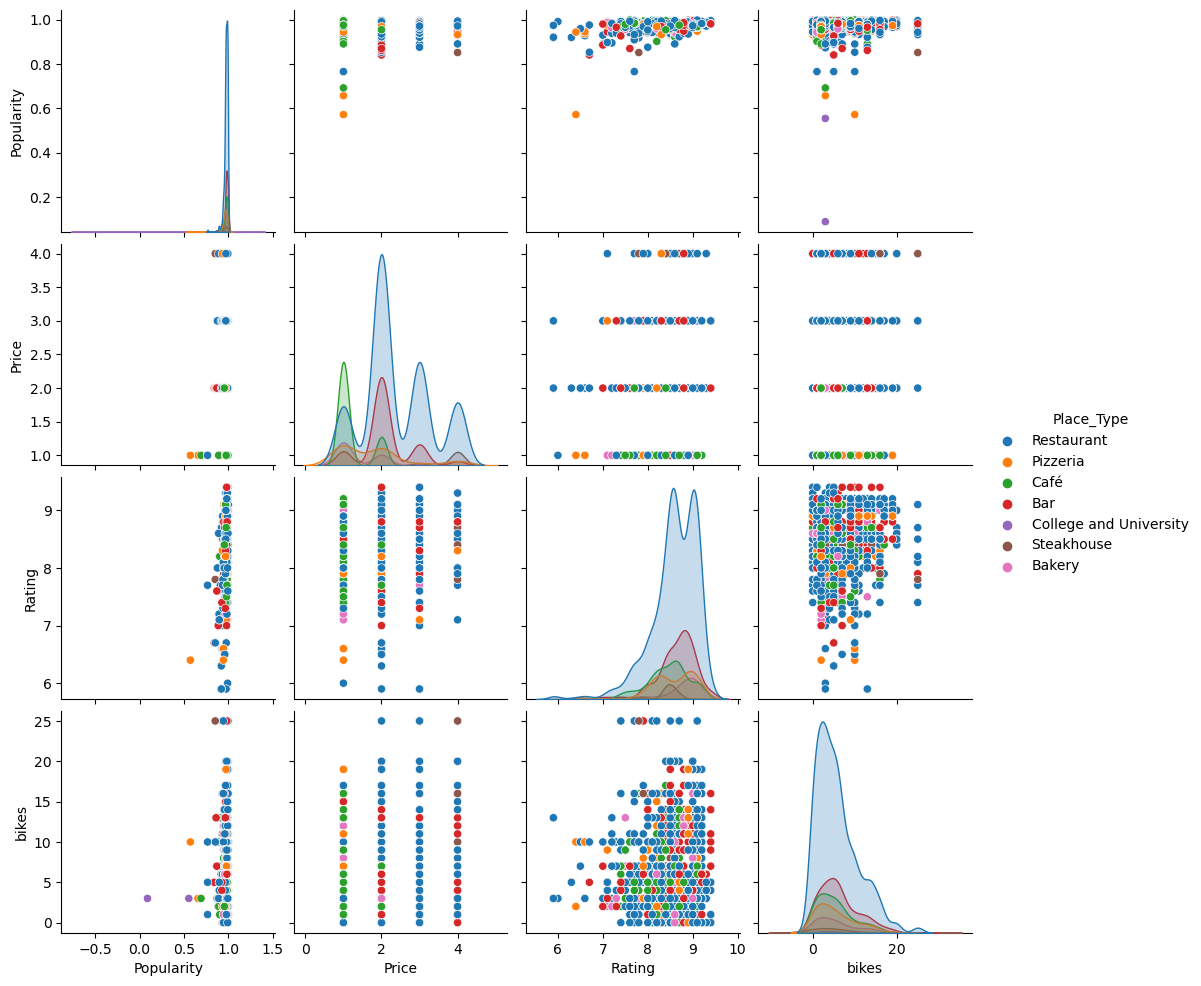

In [50]:
sns.pairplot(combined_data_clean, hue="Place_Type")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.